In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import math 

In [4]:
# Load the data into a dataframe

# Mode = ["Aligned", "Alignedv2"]
# Mode = ["Rotated", "Rot30v2"]
# Mode = ["Shifted","Shiftedv2"]
# Mode = ["Disk","Disk"]
Mode = ["CRAB","CRAB"]

data = pd.read_csv(f"../Files/{Mode[0]}/EventInfo_merge_{Mode[1]}.csv", delimiter = ",", names = ["event", "x", "y", "z", "t"])

# Cut the first bin
data = data[data['t'] > 200]
display(data)

# Load the data into a dataframe
meta = pd.read_csv(f"../Files/{Mode[0]}/Metadata_merge_{Mode[1]}.csv", delimiter = ",", names = ["event","electrons","ions","elastic","ionisations","attachment","inelastic","excitation","top","bottom","start x","start y","start z", "start E", "end E"])

display(meta)

event      x      y       z        t
0           11  0.144 -0.233 -10.656  14417.8
1           11  0.142 -0.233 -10.662  14442.2
2           11  0.138 -0.230 -10.668  14479.6
3           11  0.140 -0.230 -10.679  14530.7
4           11  0.139 -0.233 -10.681  14538.9
...        ...    ...    ...     ...      ...
9147168  10000  0.007  0.185 -11.342  18198.7
9147169  10000  0.007  0.186 -11.342  18199.9
9147170  10000  0.006  0.186 -11.343  18202.5
9147171  10000  0.006  0.186 -11.342  18203.0
9147172  10000  0.006  0.187 -11.342  18203.7

[9145174 rows x 5 columns]

event  electrons  ions    elastic  ionisations  attachment  inelastic  \
0         11          1     0  280665704            0           0          0   
1         12          1     0  255258021            0           0          0   
2         13          1     0  279804468            0           0          0   
3         14          1     0  271788988            0           0          0   
4         15          1     0  274348225            0           0          0   
...      ...        ...   ...        ...          ...         ...        ...   
19995   9996          1     0  272621250            0           0          0   
19996   9997          1     0  271369365            0           0          0   
19997   9998          1     0  274488913            0           0          0   
19998   9999          1     0  276473031            0           0          0   
19999  10000          1     0  279314368            0           0          0   

       excitation  top  bottom   start x   start y  start z   start E  \
0             440    0       1  0.267296 -0.113970     -9.3  1.000000   
1             474    0       1 -0.002986  0.166643     -9.3  8.584259   
2             439    0       1  0.085089 -0.172665     -9.3  1.300447   
3             453    0       1 -0.253318  0.167803     -9.3  1.812202   
4             450    0       1  0.043294  0.223887     -9.3  6.668031   
...           ...  ...     ...       ...       ...      ...       ...   
19995         451    0       1 -0.024953 -0.327862     -9.3  1.605795   
19996         440    0       1 -0.261035  0.320264     -9.3  3.519020   
19997         446    0       1 -0.011299 -0.352208     -9.3  6.804583   
19998         431    0       1  0.284050  0.084509     -9.3  4.942593   
19999         449    0       1  0.155559  0.301263     -9.3  3.846636   

          end E  
0      5.579504  
1      5.086201  
2      6.327660  
3      5.156646  
4      6.298644  
...         ...  
19995  1.350930  
19996  1.164161  
19997  0.833734  
19998  7.577362  
19999  0.614910  

[20000 rows x 15 columns]

In [59]:
# Print some additional info
print("ions: ", meta['ions'].sum())
print("Ionisations: ", meta['ionisations'].sum())
print("attachment: ", meta['attachment'].sum())
print("inelastic: ", meta['inelastic'].sum())
print("top: ", meta['top'].sum())
print("bottom: ", meta['bottom'].sum())
print("Mean VuV: ", meta['excitation'].mean())
print("STD/Mean VuV: ", 100*meta['excitation'].std()/meta['excitation'].mean())


ions:  0
Ionisations:  0
attachment:  0
inelastic:  0
top:  0
bottom:  19999
Mean VuV:  457.35865
STD/Mean VuV:  5.349206737567435


In [9]:
# Here we subtract off the first time bin to shift all the EL values to zero
data_test = data.copy(deep=True)

data_test1 = data_test.drop_duplicates(subset= ["event"], keep='first')
data_test1 = data_test1.drop(columns = ["x", "y", "z"])

data_test['Count'] = 1
data_test = data_test.groupby(["event"]).Count.count().reset_index()

display(data_test)
display(data_test1)

# merge the dataframes
data_merge = pd.DataFrame()
data_test1 = data_test1.merge(data_test, on='event', how="inner")
data_test1 = data_test1.reset_index(drop = True)
data_test1 = data_test1.loc[data_test1.index.repeat(data_test1.Count)]
data_test1 = data_test1.drop(columns = ["Count"])
data_test1 = data_test1.rename(columns={"t": "t_sub"})
print(data_test1)

# data = data.merge(data_test1, on="event")
test = pd.DataFrame()
test["event"] = data_test1["event"]
test["t_sub"] = data_test1["t_sub"]
test = test.reset_index(drop=True)
display(test)

# data["t_sub"] = data_test1["t_sub"]

display(data)

data = data.merge(test, on = ['event'])
# display(merged_df)

# print(len(data.event.unique()))
# display(data[ (data["event"] == 11)])

# plt.figure()
# plt.hist(data[ (data["z"] < -10.6) & (data["z"] > -10.8)]["z"])

event  Count
0         11    440
1         12    473
2         13    439
3         14    453
4         15    450
...      ...    ...
19995  20006    473
19996  20007    421
19997  20008    473
19998  20009    491
19999  20010    467

[20000 rows x 2 columns]

event        t
0           11  14417.8
441         12  13780.1
914         13  14822.0
1353        14  14758.9
1806        15  14754.4
...        ...      ...
9144956   9996  13678.5
9145407   9997  14069.3
9145847   9998  14100.8
9146293   9999  13973.9
9146724  10000  14593.2

[20000 rows x 2 columns]

       event    t_sub
0         11  14417.8
0         11  14417.8
0         11  14417.8
0         11  14417.8
0         11  14417.8
...      ...      ...
19999  10000  14593.2
19999  10000  14593.2
19999  10000  14593.2
19999  10000  14593.2
19999  10000  14593.2

[9145174 rows x 2 columns]


event    t_sub
0           11  14417.8
1           11  14417.8
2           11  14417.8
3           11  14417.8
4           11  14417.8
...        ...      ...
9145169  10000  14593.2
9145170  10000  14593.2
9145171  10000  14593.2
9145172  10000  14593.2
9145173  10000  14593.2

[9145174 rows x 2 columns]

event      x      y       z        t
0           11  0.144 -0.233 -10.656  14417.8
1           11  0.142 -0.233 -10.662  14442.2
2           11  0.138 -0.230 -10.668  14479.6
3           11  0.140 -0.230 -10.679  14530.7
4           11  0.139 -0.233 -10.681  14538.9
...        ...    ...    ...     ...      ...
9147168  10000  0.007  0.185 -11.342  18198.7
9147169  10000  0.007  0.186 -11.342  18199.9
9147170  10000  0.006  0.186 -11.343  18202.5
9147171  10000  0.006  0.186 -11.342  18203.0
9147172  10000  0.006  0.187 -11.342  18203.7

[9145174 rows x 5 columns]

In [61]:
# Bin the scatters in time
tmin=2000
tmax=9000
tbw=50

tot_tracks = (len(data['event'].unique()))

tbins = np.arange(tmin, tmax+tbw, tbw)
tbins_centre = np.arange(tmin+tbw/2, tmax+tbw/2, tbw)


data['t'] = pd.cut(x=data['t'], bins=tbins,labels=tbins_centre, include_lowest=True)
display(data)

# Now average over the events
avg = data.groupby(['t']).count()
avg = avg.fillna(0)
avg.reset_index(inplace=True) 
display(avg)

std = data.groupby(['t']).std()
std = std.fillna(0)
std.reset_index(inplace=True) 
display(std)


event      x      y       z   t
0           11  0.144 -0.233 -10.656 NaN
1           11  0.142 -0.233 -10.662 NaN
2           11  0.138 -0.230 -10.668 NaN
3           11  0.140 -0.230 -10.679 NaN
4           11  0.139 -0.233 -10.681 NaN
...        ...    ...    ...     ...  ..
9147168  10000  0.007  0.185 -11.342 NaN
9147169  10000  0.007  0.186 -11.342 NaN
9147170  10000  0.006  0.186 -11.343 NaN
9147171  10000  0.006  0.186 -11.342 NaN
9147172  10000  0.006  0.187 -11.342 NaN

[9145174 rows x 5 columns]

t  event  x  y  z
0    2025.0      0  0  0  0
1    2075.0      0  0  0  0
2    2125.0      0  0  0  0
3    2175.0      0  0  0  0
4    2225.0      0  0  0  0
..      ...    ... .. .. ..
135  8775.0      0  0  0  0
136  8825.0      0  0  0  0
137  8875.0      0  0  0  0
138  8925.0      0  0  0  0
139  8975.0      0  0  0  0

[140 rows x 5 columns]

t  event    x    y    z
0    2025.0    0.0  0.0  0.0  0.0
1    2075.0    0.0  0.0  0.0  0.0
2    2125.0    0.0  0.0  0.0  0.0
3    2175.0    0.0  0.0  0.0  0.0
4    2225.0    0.0  0.0  0.0  0.0
..      ...    ...  ...  ...  ...
135  8775.0    0.0  0.0  0.0  0.0
136  8825.0    0.0  0.0  0.0  0.0
137  8875.0    0.0  0.0  0.0  0.0
138  8925.0    0.0  0.0  0.0  0.0
139  8975.0    0.0  0.0  0.0  0.0

[140 rows x 5 columns]

/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6565: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6566: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6565: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6566: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6565: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6566: RuntimeWarning

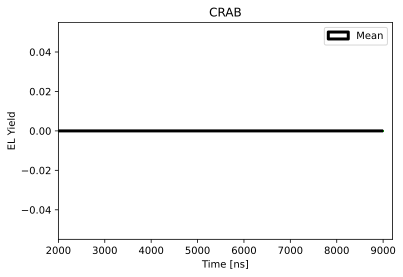

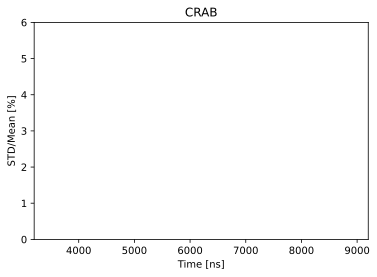

In [62]:
# Make a plot of the timing profile of the EL emission
plt.figure()

# New dataframe for storing binned hist details
data_binned = pd.DataFrame()

count = 0

for i in data['event'].unique():
    if (count > 1000): break

    # Plot the data
    counts, bins, bars  = plt.hist(data[data["event"] == i]['t'], bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "green")
    # counts, edges  = np.histogram(data[data["event"] == i]['t'], bins = np.arange(tmin, tmax+tbw, tbw))
    
    # Save binned info to a histogram
    temp_df =  pd.DataFrame({'event': np.ones(len(counts))*i,
                   'Yield': counts,
                   'Time': tbins_centre })
    
    data_binned = pd.concat([data_binned,temp_df])
    count+=1

plt.hist(avg['t'], weights = avg['event']/tot_tracks,bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3, label="Mean")
plt.xlim(2000, 9200)

plt.xlabel("Time [ns]")
plt.ylabel("EL Yield")
plt.title(Mode[1])
plt.legend()
plt.savefig("../Plots/"+Mode[0]+"/Yield_vs_Time.pdf")
# plt.title(f"Total VUV:{nVuV}")

plt.figure()
plt.scatter(avg['t'], 100*std['event']/avg['event'])
plt.xlabel("Time [ns]")
plt.ylabel("STD/Mean [%]")
plt.title(Mode[1])
plt.xlim(3200, 9200)
plt.ylim(0, 6 )
plt.savefig("../Plots/"+Mode[0]+"/Fluctuations_vs_Time.pdf")


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500,
        2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050,
        3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600,
        3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150,
        4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 47

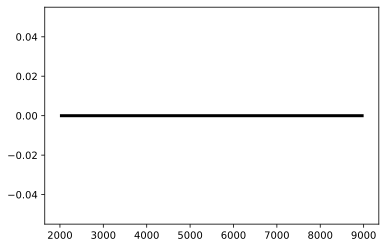

In [63]:
# Make a plot of the summed EL Yield over time
summed = data[['event', 't']]
summed = summed.drop_duplicates().groupby('t').count()
summed.reset_index(inplace=True) 
plt.figure()
plt.hist(summed['t'], weights = summed['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3)
# display(test)

Empty DataFrame
Columns: [event, Yield, Time]
Index: []

Text(0, 0.5, 'z [cm]')

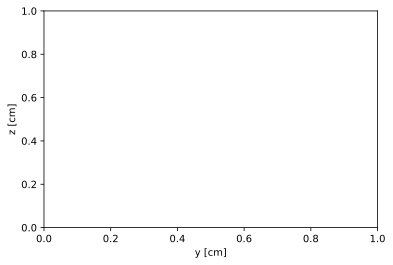

In [64]:
display(data_binned[data_binned['Yield'] > 160])
evt_highY = data_binned[data_binned['Yield'] > 120]['event'].unique()

fig = plt.figure()
ax = fig.add_subplot()

for i in evt_highY:
    ax.plot(data[data["event"] == i]['y'], data[data["event"] == i]['z'])

ax.set_xlabel("y [cm]")
ax.set_ylabel("z [cm]")



In [65]:
# Make a plot of the timing profile of the EL emission
fig = plt.figure()
ax = fig.add_subplot()

count = 0
for i in data['event'].unique():
    if (count > 1000): break
    ax.plot(data[data["event"] == i]['y'], data[data["event"] == i]['z'])
    count+=1

# ax.set_zlim(-0.8, 0.7)
# ax.set_xlim(-0.7, 0.7)
# ax.set_ylim(-0.7, 0.7)
# ax.invert_xaxis()

ax.set_xlabel("y [cm]")
ax.set_ylabel("z [cm]")
# ax.set_zlabel("z [cm]")

print(data.z.max())


-10.605


In [66]:
req_par = ['event', 'excitation', 'start x', 'start y']
meta_slim = meta[req_par]
pd.options.mode.chained_assignment = None  # default='warn'

# Flip the y axis
# meta_slim["start y"] = -meta_slim["start y"]

# Convert to mm before writing to file
meta_slim["start x"] = meta_slim["start x"].astype(float)*10
meta_slim["start y"] = meta_slim["start y"].astype(float)*10

hexsize = (1.25+0.127/2.0)/(np.cos(30*np.pi/180))
print(hexsize)

# Calculate the nearest hexagon centre to the point
def hex_round(q,r,s,mode):
    qi = int(round(q))
    ri = int(round(r))
    si = int(round(s))
    q_diff = abs(qi - q)
    r_diff = abs(ri - r)
    s_diff = abs(si - s)
    
    if q_diff > r_diff and q_diff > s_diff:
        qi = -ri - si
    else:
        if r_diff > s_diff:
            ri = -qi - si
        else:
            si = -qi - ri
    
    if (mode == "q"):
        return qi
    elif (mode == "r"):
        return ri
    else:
        return si

# Calculate q and r values for meta_slim table
meta_slim["q"] = (meta_slim["start x"] * np.sqrt(3)/3.0 - 1.0/3.0*meta_slim["start y"]) / hexsize 
meta_slim["r"] = (2.0/3.0)*meta_slim["start y"] / hexsize
meta_slim["s"] = -meta_slim["q"] - meta_slim["r"]

# Calculate the multiple of q and r of the hexagon
meta_slim["nq"] = meta_slim.apply(lambda df: hex_round(df["q"], df["r"], df["s"], "q"), axis = "columns", result_type='expand' )
meta_slim["nr"] = meta_slim.apply(lambda df: hex_round(df["q"], df["r"], df["s"], "r"), axis = "columns", result_type='expand' )

# Shift the values to unit cell
meta_slim["q"] = meta_slim["q"] - meta_slim["nq"]
meta_slim["r"] = meta_slim["r"] - meta_slim["nr"]

# Drop columns that are now not needed
meta_slim = meta_slim.drop(columns = ["s", "nq","nr", "start x", "start y"])

# Store df for later use
meta_slim_copy = meta_slim.copy()
meta_slim = meta_slim.drop(columns = ["event"])

# Define bins in q and r space
numbins = 50

bins_q, bw_q  = np.linspace(-1, +1, numbins, retstep=True)
bins_centre_q = np.linspace(-1+bw_q/2, 1+bw_q/2, numbins)[:-1]

bins_r, bw_r  = np.linspace(-1, +1, numbins, retstep=True)
bins_centre_r = np.linspace(-1+bw_r/2, 1+bw_r/2, numbins)[:-1]

# Now bin the data
meta_slim['q'] = pd.cut(x=meta_slim['q'], bins=bins_q,labels=bins_centre_q, include_lowest=True)
meta_slim['r'] = pd.cut(x=meta_slim['r'], bins=bins_r,labels=bins_centre_r, include_lowest=True)

display(meta_slim)

# Now average over the events
meta_avg_ = meta_slim.groupby(['q', 'r']).mean()
meta_avg_ = meta_avg_.fillna(0)
meta_avg_.reset_index(inplace=True) 

# Kill all the rows that are empty
meta_avg = meta_avg_[meta_avg_['excitation'] != 0]

print(meta_slim['excitation'].mean())
avg_VuV = meta_slim['excitation'].mean()


# Convert q and r back to x and y values (now should be in unit cell)
meta_avg["x"] = hexsize * (np.sqrt(3)*meta_avg["q"].astype(float) + 0.5*np.sqrt(3)*meta_avg["r"].astype(float))
meta_avg["y"] = hexsize * 1.5*meta_avg["r"].astype(float)


# Write the map to a file
meta_avg.to_hdf(f"../Maps/unitcell_{Mode[0]}.h5","Yields", mode='w', format = "table")

display(meta_avg)

1.5166991571611466


excitation         q         r
0             440  0.285714 -0.489796
1             474  0.612245 -0.285714
2             439 -0.285714  0.244898
3             453 -0.326531 -0.244898
4             450 -0.326531  0.000000
...           ...       ...       ...
19995         451 -0.367347  0.571429
19996         440  0.285714 -0.612245
19997         446 -0.285714  0.448980
19998         431 -0.122449  0.367347
19999         449 -0.081633  0.326531

[20000 rows x 3 columns]

457.35865


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/tables/file.py:426: UserWarning: a closed node found in the registry: ``/Yields/meta/values_block_1/meta/_i_table``
  warnings.warn("a closed node found in the registry: "


q         r  excitation         x         y
423  -0.653061  0.285714  461.000000 -1.340306  0.650014
424  -0.653061  0.326531  457.000000 -1.286694  0.742873
425  -0.653061  0.367347  441.500000 -1.233082  0.835732
470  -0.612245  0.204082  456.000000 -1.340306  0.464296
471  -0.612245  0.244898  458.387097 -1.286694  0.557155
...        ...       ...         ...       ...       ...
1929  0.612245 -0.244898  464.434783  1.286694 -0.557155
1930  0.612245 -0.204082  462.857143  1.340306 -0.464296
1975  0.653061 -0.367347  457.500000  1.233082 -0.835732
1976  0.653061 -0.326531  455.931034  1.286694 -0.742873
1977  0.653061 -0.285714  440.000000  1.340306 -0.650014

[649 rows x 5 columns]

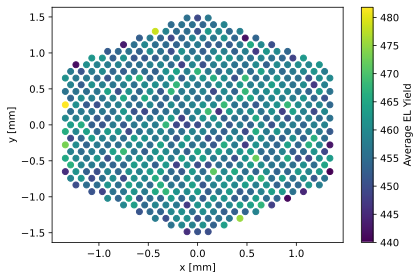

In [67]:
plt.figure()

# plt.scatter(meta_slim["start x"], meta_slim["start y"], c=meta_slim["excitation"])
sc = plt.scatter(meta_avg["x"], meta_avg["y"], c=meta_avg["excitation"])
plt.colorbar(sc, label='Average EL Yield')
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
# plt.xlim(-1.5, 1.5)
# plt.ylim(-2., 2.)
plt.tight_layout() 
plt.savefig("../Plots/"+Mode[0]+"/Yield_vs_XYpos.pdf")
plt.show()

Text(0, 0.5, 'Counts')

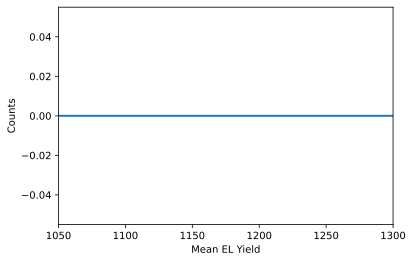

In [68]:
# Bin the EL light for each electron in mean binned map of x,y
plt.figure()
plt.hist(meta_avg["excitation"],  bins = np.arange(800, 1400, 10),histtype="step", linewidth=2,)
plt.xlim(1050, 1300)
plt.xlabel("Mean EL Yield")
plt.ylabel("Counts")


1.3127799999999994
-1.313099999999999


event  excitation         q         r        x         y
0         11         440  0.267973 -0.500956  0.04596 -1.139700
1         12         474  0.622393 -0.267519  1.28364 -0.608619
2         13         439 -0.296623  0.241049 -0.46261  0.548399
3         14         453 -0.333076 -0.262420 -1.21968 -0.597019
4         15         450 -0.327245 -0.015902 -0.88056 -0.036179
...      ...         ...       ...       ...      ...       ...
19995   9996         451 -0.374426  0.558879 -0.24953  1.271477
19996   9997         440  0.302476 -0.592276  0.01665 -1.347457
19997   9998         446 -0.268944  0.451866 -0.11299  1.028017
19998   9999         431 -0.104459  0.371460  0.21350  0.845090
19999  10000         449 -0.069948  0.324205  0.24209  0.737581

[20000 rows x 6 columns]

Calculating value:  0.1
Calculating value:  0.35
Calculating value:  0.6
Calculating value:  0.8499999999999999
Calculating value:  1.0999999999999999


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


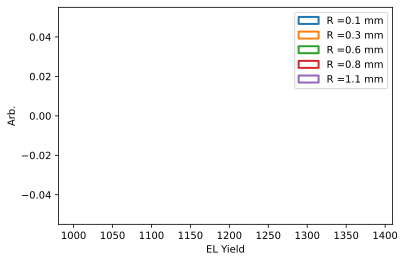

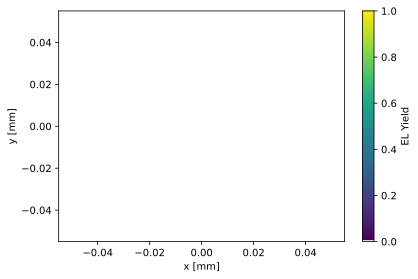

In [69]:
# Convert q and r back to x and y values (now should be in unit cell)
meta_slim_copy["x"] = hexsize * (np.sqrt(3)*meta_slim_copy["q"].astype(float) + 0.5*np.sqrt(3)*meta_slim_copy["r"].astype(float))
meta_slim_copy["y"] = hexsize * 1.5*meta_slim_copy["r"].astype(float)
print(meta_slim_copy.x.max())
print(meta_slim_copy.x.min())
display(meta_slim_copy)

plt.figure()

# Plot the total EL yield for each configuration

# Apply a radial cut
range_ = np.arange(0.1, 1.3, 0.25)
for c in range_:
    print("Calculating value: ", c)
    cutval = c
    rad_cut = meta_slim_copy[ np.sqrt(meta_slim_copy['x']*meta_slim_copy['x'] + meta_slim_copy['y']*meta_slim_copy['y']) <= cutval]['event'].unique()
    filtered_data = meta_slim_copy[meta_slim_copy.event.isin(rad_cut)]
    # display(filtered_data)

    # data_align_tot = filtered_data.pivot_table(columns=['event'], aggfunc='size').reset_index()
    # data_align_tot.columns = ['event', 'Yield']
    
    plt.hist(filtered_data['excitation'], bins = np.arange(1000, 1400, 10), histtype="step", density = True, linewidth=2, label='R ={0:.1f} mm'.format(c) )

plt.xlabel("EL Yield")
plt.ylabel("Arb.")
plt.legend(loc = 'upper right')

# Plot the x, y positions of the large excitation events
plt.figure()

# Select metadata columns where excitation is over some threshold
meta_large = meta_slim_copy[meta_slim_copy["excitation"] > 1175]


sc = plt.scatter(meta_large["x"], meta_large["y"], c=meta_large["excitation"])
plt.colorbar(sc, label='EL Yield')
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
# plt.xlim(-1.5, 1.5)
# plt.ylim(-2., 2.)
plt.tight_layout() 
plt.show()



Calculating value:  0.05


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.060000000000000005


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.07


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.08000000000000002


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.09000000000000001


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.1


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.11000000000000001


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.12000000000000001


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.13


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.14


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.15000000000000002


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.16000000000000003


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.17000000000000004


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.18000000000000005


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.19


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.2


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.21000000000000002


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.22000000000000003


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.23000000000000004


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Calculating value:  0.24000000000000005


/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


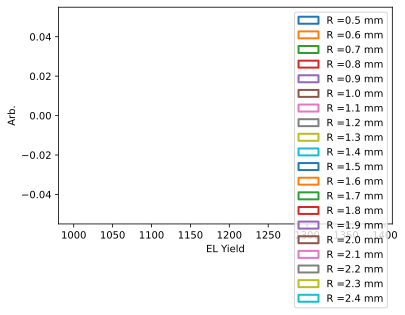

In [70]:
# Make a side by side plot of the binned energy and the radial cut

plt.figure()

# Plot the total EL yield for each configuration

# Apply a radial cut
range_ = np.arange(0.05, 0.25, 0.01)
for c in range_:
    print("Calculating value: ", c)
    cutval = c
    rad_cut = data[ np.sqrt(data['x']*data['x'] + data['y']*data['y']) >= cutval]['event'].unique()
    filtered_data = data[~data.event.isin(rad_cut)]

    data_align_tot = filtered_data.pivot_table(columns=['event'], aggfunc='size').reset_index()
    data_align_tot.columns = ['event', 'Yield']
    plt.hist(data_align_tot['Yield'], bins = np.arange(1000, 1400, 10), histtype="step", density= True, linewidth=2, label='R ={0:.1f} mm'.format(c*10) )

plt.xlabel("EL Yield")
plt.ylabel("Arb.")
plt.legend(loc = 'upper right')
# plt.savefig("../Plots/"+Mode[1]+"/YieldTotal.pdf")

In [71]:
# Plot the x, y positions of the large excitation events
plt.figure()

data_large_slim = data_large.drop_duplicates(subset = ["event"])

sc = plt.scatter(data_large_slim["start x"], data_large_slim["start y"], c=data_large_slim["excitation"])
plt.colorbar(sc, label='EL Yield')
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
# plt.xlim(-1.5, 1.5)
# plt.ylim(-2., 2.)
plt.tight_layout() 
plt.show()

NameError: name 'data_large' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
# Select metadata columns where excitation is over some threshold
meta_large = meta[meta["excitation"] > 1225]

# Merge dataframe to get start position in the data table
data_large= data.merge(meta_large, on="event", how = 'inner')


data_large = data_large.drop(columns=["electrons", "ions", "elastic", "ionisations", "attachment", "inelastic","top", "bottom", "start z", "start E", "end E"])


display(data_large)

# Make a plot of the timing profile of the EL emission
fig = plt.figure()
ax = fig.add_subplot()

count = 0
for i in data_large['event'].unique():
    if (count > 100): break
    ax.plot(data_large[data_large["event"] == i]['y'], data_large[data_large["event"] == i]['z'])
    count+=1

# ax.set_zlim(-0.8, 0.7)
# ax.set_xlim(-0.7, 0.7)
# ax.set_ylim(-0.7, 0.7)
# ax.invert_xaxis()

ax.set_xlabel("y [cm]")
ax.set_ylabel("z [cm]")
# ax.set_zlabel("z [cm]")

